In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Okay! We're going back to our bike path dataset here. I live in Montreal, and I was curious about whether we're more of a commuter city or a biking-for-fun city -- do people bike more on weekends, or on weekdays?

# 4.1 Adding a 'weekday' column to our dataframe

First, we need to load up the data. We've done this before.

In [7]:
df=pd.read_csv("bikes.csv",sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...
2012-11-01,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-11-02,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-11-03,844,NaN,380,612,1137,713,105,1302,NaN


Next up, we're just going to look at the Berri bike path. Berri is a street in Montreal, with a pretty important bike path. I use it mostly on my way to the library now, but I used to take it to work sometimes when I worked in Old Montreal. 

So we're going to create a dataframe with just the Berri bikepath in it

In [16]:
#we are creating a dataframe with just berri oath 
exp1_df=df[['Berri 1']].copy()
type(exp1_df)

pandas.core.frame.DataFrame

Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [30]:
#here the indes ae the dates 
# now we have to add a column named as weekday
#so we have to use index columsn so
# here we are going to handle or use it logicaly 
df.index
df.index.day
df.index.weekday
# these are the week days which we want to add in teh new column so i am gonna put thi value to t=hat column
df["weekday"]=df.index.weekday
df['weekday'].isnull().count()
df.head(1)


,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),weekday
Date,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,6


You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [32]:
# # Assuming your DataFrame 'df' has a datetime column named 'Date'
# # (Replace 'Date' with the actual name of your datetime column)

# # Convert the 'Date' column to datetime objects if it's not already
# df['Date'] = pd.to_datetime(df['Date']) 

# # Extract the day of the month and create a new column 'Day'
# df['Day'] = df['Date'].dt.day

We actually want the weekday, though:

In [34]:
df.index.weekday

Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       ...
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int32', name='Date', length=310)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [36]:
df['answer']=df.index.weekday
df.head(1)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),weekday,answer
Date,,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,6,6


# 4.2 Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').sum()` means "Group the rows by weekday and then add up all the values with the same weekday".

In [44]:
#now i have to add the data based on a group 
exp1_df=-df.groupby('weekday').sum()
exp1_df

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),answer
weekday,,,,,,,,,,
0,-134298,-0.0,-60329,-90051,-163767,-90184,-46204,-130130,-0.0,0
1,-135305,-0.0,-58708,-92035,-165880,-91399,-35167,-120088,-0.0,-44
2,-152972,-0.0,-67344,-104891,-186061,-102103,-43263,-133088,-0.0,-88
3,-160131,-0.0,-69028,-111895,-196715,-105674,-45385,-140241,-0.0,-132
4,-141771,-0.0,-56446,-98568,-172390,-89872,-42470,-137255,-0.0,-176
5,-101578,-0.0,-34018,-62067,-105060,-48289,-52861,-112828,-0.0,-220
6,-99310,-0.0,-36466,-55324,-98308,-50004,-61485,-117150,-0.0,-270


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [45]:
exp1_df.index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
exp1_df

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),answer
Monday,-134298,-0.0,-60329,-90051,-163767,-90184,-46204,-130130,-0.0,0
Tuesday,-135305,-0.0,-58708,-92035,-165880,-91399,-35167,-120088,-0.0,-44
Wednesday,-152972,-0.0,-67344,-104891,-186061,-102103,-43263,-133088,-0.0,-88
Thursday,-160131,-0.0,-69028,-111895,-196715,-105674,-45385,-140241,-0.0,-132
Friday,-141771,-0.0,-56446,-98568,-172390,-89872,-42470,-137255,-0.0,-176
Saturday,-101578,-0.0,-34018,-62067,-105060,-48289,-52861,-112828,-0.0,-220
Sunday,-99310,-0.0,-36466,-55324,-98308,-50004,-61485,-117150,-0.0,-270


<Axes: >

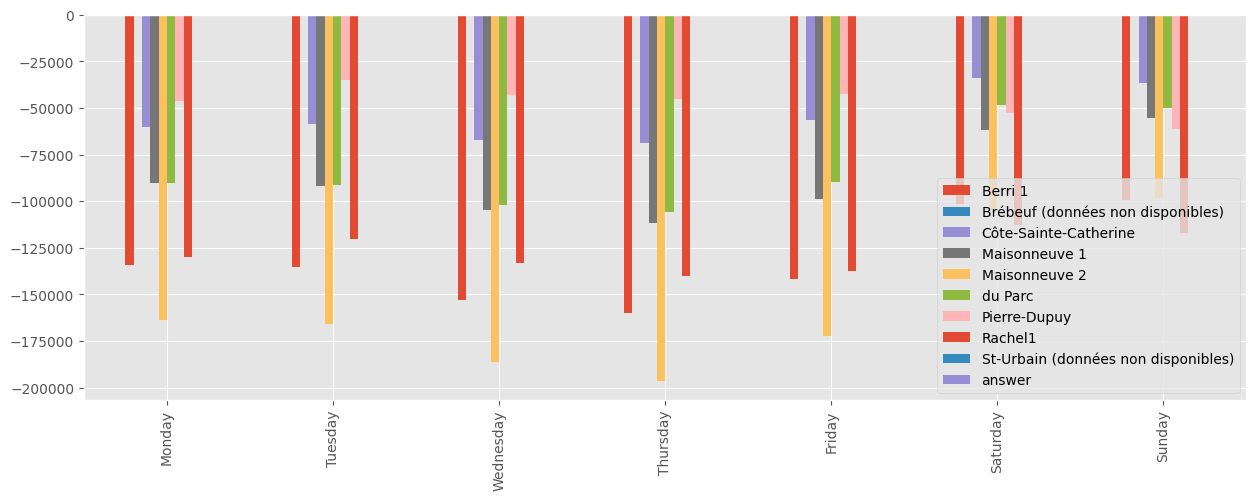

In [46]:
exp1_df.plot(kind='bar')

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

# 4.3 Putting it together

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing `sum` to `max`, `numpy.median`, or any other function you like.